In [13]:
#Importing necessary libraries 
import keras
import numpy as np
import pandas as pd
from keras.applications import VGG16, inception_v3, resnet50, mobilenet
from keras import models
from keras import layers
from keras import optimizers
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import os 
import glob
import tifffile as tif
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from tempfile import TemporaryFile
from sklearn import model_selection
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.layers.normalization import BatchNormalization
from keras.preprocessing.image import ImageDataGenerator
from keras.regularizers import l1

In [14]:
# dataset
dataset = []
paths = []
labels = []
input_size = 64
input_size = 64
num_channel = 13
# getting paths of stored images 
def read_files(path):
    for dirpath, dirnames, filenames in os.walk(path):
    #print('Current path: ', dirpath)
    #print('Directories: ', dirnames)
    #print('Files: ', filenames)
    #print(dirpath)
       #os.chdir(dirpath)
       paths.append(dirpath)
       
     
read_files('/home/sachin_sharma/Desktop/exp2_tif')
paths.sort()
paths = paths[1:]
file_names = []

In [15]:
print(paths)

['/home/sachin_sharma/Desktop/exp2_tif/Else', '/home/sachin_sharma/Desktop/exp2_tif/Industrial', '/home/sachin_sharma/Desktop/exp2_tif/Residential']


In [16]:
# Converting 13 channel images to np array
def img_array(paths):
    print('{}'.format(paths))
    os.chdir('{}'.format(paths))
    for file in glob.glob("*.tif"):
            print('name of file: '+ file)
            file_names.append(file)
            x = tif.imread('{}'.format(file))
            basename, ext = os.path.splitext(file)
            labels.append(basename)
            x = np.resize(x, (64, 64, 13))
            dataset.append(x)

#calling
for pths in paths:
    img_array(pths)


/home/sachin_sharma/Desktop/exp2_tif/Else
name of file: Else_16972.tif
name of file: Else_451.tif
name of file: Else_9032.tif
name of file: Else_17774.tif
name of file: Else_7909.tif
name of file: Else_7399.tif
name of file: Else_14295.tif
name of file: Else_18253.tif
name of file: Else_19369.tif
name of file: Else_7717.tif
name of file: Else_871.tif
name of file: Else_15845.tif
name of file: Else_11001.tif
name of file: Else_19131.tif
name of file: Else_2237.tif
name of file: Else_5061.tif
name of file: Else_3606.tif
name of file: Else_20075.tif
name of file: Else_16866.tif
name of file: Else_18702.tif
name of file: Else_19483.tif
name of file: Else_19045.tif
name of file: Else_10168.tif
name of file: Else_10963.tif
name of file: Else_15972.tif
name of file: Else_10156.tif
name of file: Else_4307.tif
name of file: Else_11706.tif
name of file: Else_19345.tif
name of file: Else_20228.tif
name of file: Else_11966.tif
name of file: Else_2989.tif
name of file: Else_5651.tif
name of file: E

name of file: Else_7650.tif
name of file: Else_16581.tif
name of file: Else_4161.tif
name of file: Else_20237.tif
name of file: Else_10892.tif
name of file: Else_10583.tif
name of file: Else_12056.tif
name of file: Else_19058.tif
name of file: Else_488.tif
name of file: Else_12826.tif
name of file: Else_10947.tif
name of file: Else_10159.tif
name of file: Else_2911.tif
name of file: Else_6180.tif
name of file: Else_17833.tif
name of file: Else_17184.tif
name of file: Else_5170.tif
name of file: Else_3754.tif
name of file: Else_3045.tif
name of file: Else_3056.tif
name of file: Else_5482.tif
name of file: Else_178.tif
name of file: Else_8310.tif
name of file: Else_7371.tif
name of file: Else_7649.tif
name of file: Else_2208.tif
name of file: Else_5345.tif
name of file: Else_13709.tif
name of file: Else_9239.tif
name of file: Else_17740.tif
name of file: Else_5469.tif
name of file: Else_10641.tif
name of file: Else_19425.tif
name of file: Else_13243.tif
name of file: Else_4421.tif
name o

name of file: Else_792.tif
name of file: Else_1994.tif
name of file: Else_1987.tif
name of file: Else_21077.tif
name of file: Else_18382.tif
name of file: Else_1780.tif
name of file: Else_20907.tif
name of file: Else_18943.tif
name of file: Else_20045.tif
name of file: Else_7744.tif
name of file: Else_19627.tif
name of file: Else_13245.tif
name of file: Else_9527.tif
name of file: Else_12936.tif
name of file: Else_7331.tif
name of file: Else_1219.tif
name of file: Else_18592.tif
name of file: Else_18680.tif
name of file: Else_11228.tif
name of file: Else_14483.tif
name of file: Else_9126.tif
name of file: Else_18932.tif
name of file: Else_19933.tif
name of file: Else_5085.tif
name of file: Else_12262.tif
name of file: Else_10907.tif
name of file: Else_1503.tif
name of file: Else_2067.tif
name of file: Else_18925.tif
name of file: Else_8196.tif
name of file: Else_8957.tif
name of file: Else_750.tif
name of file: Else_9949.tif
name of file: Else_8293.tif
name of file: Else_17433.tif
name

name of file: Else_12431.tif
name of file: Else_16492.tif
name of file: Else_14722.tif
name of file: Else_145.tif
name of file: Else_5276.tif
name of file: Else_2969.tif
name of file: Else_5681.tif
name of file: Else_5851.tif
name of file: Else_16534.tif
name of file: Else_8172.tif
name of file: Else_6683.tif
name of file: Else_17124.tif
name of file: Else_16135.tif
name of file: Else_18940.tif
name of file: Else_7875.tif
name of file: Else_19546.tif
name of file: Else_7043.tif
name of file: Else_17377.tif
name of file: Else_11949.tif
name of file: Else_19770.tif
name of file: Else_19552.tif
name of file: Else_2836.tif
name of file: Else_12180.tif
name of file: Else_15354.tif
name of file: Else_13623.tif
name of file: Else_19324.tif
name of file: Else_1021.tif
name of file: Else_15386.tif
name of file: Else_4337.tif
name of file: Else_14429.tif
name of file: Else_18441.tif
name of file: Else_9950.tif
name of file: Else_19296.tif
name of file: Else_8151.tif
name of file: Else_19409.tif


name of file: Else_3697.tif
name of file: Else_8896.tif
name of file: Else_2519.tif
name of file: Else_3105.tif
name of file: Else_5986.tif
name of file: Else_12442.tif
name of file: Else_10203.tif
name of file: Else_10009.tif
name of file: Else_16820.tif
name of file: Else_1670.tif
name of file: Else_3661.tif
name of file: Else_21457.tif
name of file: Else_14405.tif
name of file: Else_6799.tif
name of file: Else_14594.tif
name of file: Else_13905.tif
name of file: Else_21355.tif
name of file: Else_8229.tif
name of file: Else_15925.tif
name of file: Else_12938.tif
name of file: Else_2500.tif
name of file: Else_14076.tif
name of file: Else_7087.tif
name of file: Else_15907.tif
name of file: Else_17167.tif
name of file: Else_1844.tif
name of file: Else_20539.tif
name of file: Else_8846.tif
name of file: Else_702.tif
name of file: Else_12685.tif
name of file: Else_10742.tif
name of file: Else_10646.tif
name of file: Else_18366.tif
name of file: Else_5745.tif
name of file: Else_356.tif
nam

name of file: Else_7906.tif
name of file: Else_20925.tif
name of file: Else_20871.tif
name of file: Else_13413.tif
name of file: Else_15454.tif
name of file: Else_3794.tif
name of file: Else_17323.tif
name of file: Else_5667.tif
name of file: Else_10020.tif
name of file: Else_932.tif
name of file: Else_11114.tif
name of file: Else_17595.tif
name of file: Else_17604.tif
name of file: Else_20391.tif
name of file: Else_17745.tif
name of file: Else_16662.tif
name of file: Else_8757.tif
name of file: Else_11886.tif
name of file: Else_1898.tif
name of file: Else_2006.tif
name of file: Else_7032.tif
name of file: Else_1494.tif
name of file: Else_5184.tif
name of file: Else_15591.tif
name of file: Else_1253.tif
name of file: Else_10928.tif
name of file: Else_9877.tif
name of file: Else_3966.tif
name of file: Else_16390.tif
name of file: Else_10746.tif
name of file: Else_2530.tif
name of file: Else_20201.tif
name of file: Else_14048.tif
name of file: Else_4404.tif
name of file: Else_11741.tif
n

name of file: Else_15758.tif
name of file: Else_13390.tif
name of file: Else_15684.tif
name of file: Else_18109.tif
name of file: Else_3357.tif
name of file: Else_2388.tif
name of file: Else_3401.tif
name of file: Else_15551.tif
name of file: Else_7608.tif
name of file: Else_5157.tif
name of file: Else_9842.tif
name of file: Else_13039.tif
name of file: Else_2720.tif
name of file: Else_8815.tif
name of file: Else_20749.tif
name of file: Else_5014.tif
name of file: Else_21495.tif
name of file: Else_14912.tif
name of file: Else_9482.tif
name of file: Else_2386.tif
name of file: Else_185.tif
name of file: Else_9506.tif
name of file: Else_2143.tif
name of file: Else_20348.tif
name of file: Else_19162.tif
name of file: Else_14758.tif
name of file: Else_4570.tif
name of file: Else_5673.tif
name of file: Else_8609.tif
name of file: Else_16718.tif
name of file: Else_10391.tif
name of file: Else_20208.tif
name of file: Else_16145.tif
name of file: Else_134.tif
name of file: Else_140.tif
name of

name of file: Else_18801.tif
name of file: Else_1572.tif
name of file: Else_10801.tif
name of file: Else_14410.tif
name of file: Else_20841.tif
name of file: Else_3892.tif
name of file: Else_1490.tif
name of file: Else_13680.tif
name of file: Else_9897.tif
name of file: Else_11720.tif
name of file: Else_4796.tif
name of file: Else_16761.tif
name of file: Else_15921.tif
name of file: Else_18456.tif
name of file: Else_8412.tif
name of file: Else_4357.tif
name of file: Else_13457.tif
name of file: Else_6184.tif
name of file: Else_12634.tif
name of file: Else_15433.tif
name of file: Else_8184.tif
name of file: Else_20367.tif
name of file: Else_3850.tif
name of file: Else_5115.tif
name of file: Else_8632.tif
name of file: Else_16286.tif
name of file: Else_1281.tif
name of file: Else_4961.tif
name of file: Else_16668.tif
name of file: Else_19957.tif
name of file: Else_708.tif
name of file: Else_7785.tif
name of file: Else_1334.tif
name of file: Else_5329.tif
name of file: Else_9408.tif
name 

name of file: Else_5761.tif
name of file: Else_4843.tif
name of file: Else_8549.tif
name of file: Else_7818.tif
name of file: Else_18338.tif
name of file: Else_19270.tif
name of file: Else_18031.tif
name of file: Else_17174.tif
name of file: Else_11156.tif
name of file: Else_6347.tif
name of file: Else_5937.tif
name of file: Else_14774.tif
name of file: Else_15309.tif
name of file: Else_10658.tif
name of file: Else_6919.tif
name of file: Else_15994.tif
name of file: Else_2846.tif
name of file: Else_4984.tif
name of file: Else_14605.tif
name of file: Else_8355.tif
name of file: Else_171.tif
name of file: Else_20735.tif
name of file: Else_10379.tif
name of file: Else_9082.tif
name of file: Else_16372.tif
name of file: Else_11285.tif
name of file: Else_9924.tif
name of file: Else_1236.tif
name of file: Else_21320.tif
name of file: Else_16588.tif
name of file: Else_651.tif
name of file: Else_12511.tif
name of file: Else_17787.tif
name of file: Else_2607.tif
name of file: Else_15600.tif
nam

name of file: Else_14614.tif
name of file: Else_959.tif
name of file: Else_1140.tif
name of file: Else_9652.tif
name of file: Else_13635.tif
name of file: Else_15918.tif
name of file: Else_19342.tif
name of file: Else_15966.tif
name of file: Else_13541.tif
name of file: Else_13886.tif
name of file: Else_20849.tif
name of file: Else_14158.tif
name of file: Else_7575.tif
name of file: Else_5711.tif
name of file: Else_14770.tif
name of file: Else_407.tif
name of file: Else_15314.tif
name of file: Else_15163.tif
name of file: Else_12701.tif
name of file: Else_14795.tif
name of file: Else_1615.tif
name of file: Else_8212.tif
name of file: Else_15248.tif
name of file: Else_11592.tif
name of file: Else_1695.tif
name of file: Else_7792.tif
name of file: Else_18461.tif
name of file: Else_7201.tif
name of file: Else_16445.tif
name of file: Else_15116.tif
name of file: Else_16951.tif
name of file: Else_1600.tif
name of file: Else_19312.tif
name of file: Else_20374.tif
name of file: Else_1679.tif


name of file: Else_8457.tif
name of file: Else_7007.tif
name of file: Else_16415.tif
name of file: Else_11836.tif
name of file: Else_18604.tif
name of file: Else_20591.tif
name of file: Else_5433.tif
name of file: Else_1683.tif
name of file: Else_681.tif
name of file: Else_19590.tif
name of file: Else_2900.tif
name of file: Else_10971.tif
name of file: Else_2357.tif
name of file: Else_14143.tif
name of file: Else_15884.tif
name of file: Else_21402.tif
name of file: Else_14289.tif
name of file: Else_8433.tif
name of file: Else_17141.tif
name of file: Else_4809.tif
name of file: Else_6051.tif
name of file: Else_2325.tif
name of file: Else_4997.tif
name of file: Else_17506.tif
name of file: Else_20305.tif
name of file: Else_11177.tif
name of file: Else_1349.tif
name of file: Else_20263.tif
name of file: Else_20410.tif
name of file: Else_7515.tif
name of file: Else_1869.tif
name of file: Else_18181.tif
name of file: Else_1067.tif
name of file: Else_13922.tif
name of file: Else_9060.tif
nam

name of file: Else_1617.tif
name of file: Else_20491.tif
name of file: Else_4674.tif
name of file: Else_11254.tif
name of file: Else_20798.tif
name of file: Else_21132.tif
name of file: Else_15978.tif
name of file: Else_6921.tif
name of file: Else_17737.tif
name of file: Else_11835.tif
name of file: Else_12459.tif
name of file: Else_13795.tif
name of file: Else_4886.tif
name of file: Else_16316.tif
name of file: Else_15.tif
name of file: Else_3729.tif
name of file: Else_15621.tif
name of file: Else_4779.tif
name of file: Else_3298.tif
name of file: Else_4562.tif
name of file: Else_21258.tif
name of file: Else_7312.tif
name of file: Else_13763.tif
name of file: Else_603.tif
name of file: Else_16489.tif
name of file: Else_1546.tif
name of file: Else_16729.tif
name of file: Else_15012.tif
name of file: Else_9236.tif
name of file: Else_17137.tif
name of file: Else_8462.tif
name of file: Else_18785.tif
name of file: Else_7292.tif
name of file: Else_2676.tif
name of file: Else_4621.tif
name 

name of file: Else_12716.tif
name of file: Else_18893.tif
name of file: Else_5242.tif
name of file: Else_20606.tif
name of file: Else_8568.tif
name of file: Else_4750.tif
name of file: Else_19592.tif
name of file: Else_16157.tif
name of file: Else_7557.tif
name of file: Else_1582.tif
name of file: Else_14160.tif
name of file: Else_1330.tif
name of file: Else_19625.tif
name of file: Else_1824.tif
name of file: Else_9025.tif
name of file: Else_916.tif
name of file: Else_13318.tif
name of file: Else_12438.tif
name of file: Else_6356.tif
name of file: Else_12452.tif
name of file: Else_19561.tif
name of file: Else_5650.tif
name of file: Else_8675.tif
name of file: Else_18589.tif
name of file: Else_1280.tif
name of file: Else_3101.tif
name of file: Else_18919.tif
name of file: Else_18518.tif
name of file: Else_15286.tif
name of file: Else_9084.tif
name of file: Else_6732.tif
name of file: Else_17770.tif
name of file: Else_3176.tif
name of file: Else_12051.tif
name of file: Else_2871.tif
name

name of file: Else_2404.tif
name of file: Else_9166.tif
name of file: Else_3028.tif
name of file: Else_12331.tif
name of file: Else_972.tif
name of file: Else_8274.tif
name of file: Else_9500.tif
name of file: Else_20546.tif
name of file: Else_15372.tif
name of file: Else_12192.tif
name of file: Else_10661.tif
name of file: Else_13341.tif
name of file: Else_9996.tif
name of file: Else_12484.tif
name of file: Else_360.tif
name of file: Else_18988.tif
name of file: Else_1919.tif
name of file: Else_18006.tif
name of file: Else_18554.tif
name of file: Else_9866.tif
name of file: Else_20717.tif
name of file: Else_16248.tif
name of file: Else_6646.tif
name of file: Else_9959.tif
name of file: Else_11929.tif
name of file: Else_18104.tif
name of file: Else_8273.tif
name of file: Else_7780.tif
name of file: Else_3851.tif
name of file: Else_15572.tif
name of file: Else_1162.tif
name of file: Else_11610.tif
name of file: Else_9310.tif
name of file: Else_9113.tif
name of file: Else_10000.tif
name 

name of file: Else_9203.tif
name of file: Else_4284.tif
name of file: Else_9453.tif
name of file: Else_5038.tif
name of file: Else_11009.tif
name of file: Else_944.tif
name of file: Else_5332.tif
name of file: Else_121.tif
name of file: Else_5573.tif
name of file: Else_19374.tif
name of file: Else_13065.tif
name of file: Else_20037.tif
name of file: Else_17886.tif
name of file: Else_3082.tif
name of file: Else_14578.tif
name of file: Else_21086.tif
name of file: Else_4980.tif
name of file: Else_7172.tif
name of file: Else_15486.tif
name of file: Else_4969.tif
name of file: Else_2899.tif
name of file: Else_2129.tif
name of file: Else_795.tif
name of file: Else_13330.tif
name of file: Else_19991.tif
name of file: Else_3250.tif
name of file: Else_8876.tif
name of file: Else_166.tif
name of file: Else_16634.tif
name of file: Else_3455.tif
name of file: Else_8592.tif
name of file: Else_9528.tif
name of file: Else_17659.tif
name of file: Else_7282.tif
name of file: Else_580.tif
name of file:

name of file: Else_12801.tif
name of file: Else_10085.tif
name of file: Else_17016.tif
name of file: Else_11984.tif
name of file: Else_19555.tif
name of file: Else_12443.tif
name of file: Else_17324.tif
name of file: Else_3756.tif
name of file: Else_14115.tif
name of file: Else_1151.tif
name of file: Else_4422.tif
name of file: Else_586.tif
name of file: Else_21449.tif
name of file: Else_6432.tif
name of file: Else_17571.tif
name of file: Else_8565.tif
name of file: Else_161.tif
name of file: Else_4316.tif
name of file: Else_11337.tif
name of file: Else_19215.tif
name of file: Else_21485.tif
name of file: Else_3588.tif
name of file: Else_825.tif
name of file: Else_12709.tif
name of file: Else_15273.tif
name of file: Else_17697.tif
name of file: Else_9131.tif
name of file: Else_4097.tif
name of file: Else_13150.tif
name of file: Else_9791.tif
name of file: Else_262.tif
name of file: Else_5678.tif
name of file: Else_11824.tif
name of file: Else_19786.tif
name of file: Else_14276.tif
name

name of file: Else_9615.tif
name of file: Else_2669.tif
name of file: Else_14519.tif
name of file: Else_15315.tif
name of file: Else_17263.tif
name of file: Else_10673.tif
name of file: Else_14153.tif
name of file: Else_3205.tif
name of file: Else_6221.tif
name of file: Else_13666.tif
name of file: Else_19187.tif
name of file: Else_7450.tif
name of file: Else_12736.tif
name of file: Else_15737.tif
name of file: Else_3040.tif
name of file: Else_436.tif
name of file: Else_6803.tif
name of file: Else_11944.tif
name of file: Else_3229.tif
name of file: Else_16496.tif
name of file: Else_7624.tif
name of file: Else_1740.tif
name of file: Else_10215.tif
name of file: Else_16932.tif
name of file: Else_1928.tif
name of file: Else_10520.tif
name of file: Else_6707.tif
name of file: Else_18799.tif
name of file: Else_635.tif
name of file: Else_1588.tif
name of file: Else_10402.tif
name of file: Else_15547.tif
name of file: Else_7661.tif
name of file: Else_15252.tif
name of file: Else_3421.tif
name

name of file: Else_17891.tif
name of file: Else_7612.tif
name of file: Else_3245.tif
name of file: Else_10601.tif
name of file: Else_10556.tif
name of file: Else_7564.tif
name of file: Else_4322.tif
name of file: Else_20380.tif
name of file: Else_4710.tif
name of file: Else_3650.tif
name of file: Else_21138.tif
name of file: Else_195.tif
name of file: Else_19658.tif
name of file: Else_17076.tif
name of file: Else_14349.tif
name of file: Else_4453.tif
name of file: Else_13671.tif
name of file: Else_18632.tif
name of file: Else_11938.tif
name of file: Else_20232.tif
name of file: Else_7703.tif
name of file: Else_9139.tif
name of file: Else_4330.tif
name of file: Else_1283.tif
name of file: Else_17797.tif
name of file: Else_7474.tif
name of file: Else_381.tif
name of file: Else_2885.tif
name of file: Else_9299.tif
name of file: Else_13366.tif
name of file: Else_9769.tif
name of file: Else_677.tif
name of file: Else_18841.tif
name of file: Else_6971.tif
name of file: Else_10439.tif
name of

name of file: Else_11710.tif
name of file: Else_8799.tif
name of file: Else_6787.tif
name of file: Else_6574.tif
name of file: Else_2449.tif
name of file: Else_11074.tif
name of file: Else_13444.tif
name of file: Else_14573.tif
name of file: Else_7623.tif
name of file: Else_6154.tif
name of file: Else_6450.tif
name of file: Else_2354.tif
name of file: Else_20672.tif
name of file: Else_3116.tif
name of file: Else_15294.tif
name of file: Else_15671.tif
name of file: Else_9709.tif
name of file: Else_1983.tif
name of file: Else_6025.tif
name of file: Else_9656.tif
name of file: Else_7808.tif
name of file: Else_17311.tif
name of file: Else_2769.tif
name of file: Else_12167.tif
name of file: Else_15253.tif
name of file: Else_12237.tif
name of file: Else_3517.tif
name of file: Else_1912.tif
name of file: Else_9287.tif
name of file: Else_18849.tif
name of file: Else_4665.tif
name of file: Else_17001.tif
name of file: Else_16079.tif
name of file: Else_8117.tif
name of file: Else_6525.tif
name o

name of file: Else_18820.tif
name of file: Else_19356.tif
name of file: Else_4852.tif
name of file: Else_6373.tif
name of file: Else_14700.tif
name of file: Else_6571.tif
name of file: Else_6125.tif
name of file: Else_15676.tif
name of file: Else_91.tif
name of file: Else_4159.tif
name of file: Else_9836.tif
name of file: Else_19230.tif
name of file: Else_16162.tif
name of file: Else_17580.tif
name of file: Else_10740.tif
name of file: Else_18342.tif
name of file: Else_17705.tif
name of file: Else_18218.tif
name of file: Else_4640.tif
name of file: Else_6378.tif
name of file: Else_13880.tif
name of file: Else_6283.tif
name of file: Else_2384.tif
name of file: Else_5476.tif
name of file: Else_13128.tif
name of file: Else_9985.tif
name of file: Else_8488.tif
name of file: Else_1661.tif
name of file: Else_2496.tif
name of file: Else_8252.tif
name of file: Else_1566.tif
name of file: Else_8306.tif
name of file: Else_14323.tif
name of file: Else_16826.tif
name of file: Else_2901.tif
name of

name of file: Else_2416.tif
name of file: Else_15070.tif
name of file: Else_20357.tif
name of file: Else_2074.tif
name of file: Else_7154.tif
name of file: Else_6991.tif
name of file: Else_14631.tif
name of file: Else_6947.tif
name of file: Else_7967.tif
name of file: Else_19704.tif
name of file: Else_20813.tif
name of file: Else_19111.tif
name of file: Else_17679.tif
name of file: Else_4175.tif
name of file: Else_11491.tif
name of file: Else_14133.tif
name of file: Else_13036.tif
name of file: Else_20752.tif
name of file: Else_18411.tif
name of file: Else_7882.tif
name of file: Else_5137.tif
name of file: Else_10999.tif
name of file: Else_10898.tif
name of file: Else_20930.tif
name of file: Else_14159.tif
name of file: Else_16892.tif
name of file: Else_2827.tif
name of file: Else_15342.tif
name of file: Else_1166.tif
name of file: Else_8740.tif
name of file: Else_14043.tif
name of file: Else_12705.tif
name of file: Else_609.tif
name of file: Else_3117.tif
name of file: Else_17219.tif


name of file: Else_8067.tif
name of file: Else_17698.tif
name of file: Else_20176.tif
name of file: Else_18341.tif
name of file: Else_17997.tif
name of file: Else_14909.tif
name of file: Else_4440.tif
name of file: Else_15293.tif
name of file: Else_21284.tif
name of file: Else_20917.tif
name of file: Else_6640.tif
name of file: Else_14840.tif
name of file: Else_1101.tif
name of file: Else_2423.tif
name of file: Else_16714.tif
name of file: Else_14931.tif
name of file: Else_11193.tif
name of file: Else_15451.tif
name of file: Else_7146.tif
name of file: Else_6200.tif
name of file: Else_15680.tif
name of file: Else_7773.tif
name of file: Else_20910.tif
name of file: Else_8243.tif
name of file: Else_595.tif
name of file: Else_9819.tif
name of file: Else_5471.tif
name of file: Else_14395.tif
name of file: Else_98.tif
name of file: Else_2356.tif
name of file: Else_14173.tif
name of file: Else_18601.tif
name of file: Else_3575.tif
name of file: Else_6122.tif
name of file: Else_9577.tif
name 

name of file: Else_11106.tif
name of file: Else_2491.tif
name of file: Else_19733.tif
name of file: Else_17728.tif
name of file: Else_11322.tif
name of file: Else_18087.tif
name of file: Else_2422.tif
name of file: Else_5634.tif
name of file: Else_11236.tif
name of file: Else_4391.tif
name of file: Else_20109.tif
name of file: Else_2270.tif
name of file: Else_15337.tif
name of file: Else_5719.tif
name of file: Else_20475.tif
name of file: Else_11855.tif
name of file: Else_13535.tif
name of file: Else_1115.tif
name of file: Else_11911.tif
name of file: Else_16795.tif
name of file: Else_3300.tif
name of file: Else_15964.tif
name of file: Else_1143.tif
name of file: Else_16164.tif
name of file: Else_9043.tif
name of file: Else_19500.tif
name of file: Else_14940.tif
name of file: Else_4375.tif
name of file: Else_18850.tif
name of file: Else_6031.tif
name of file: Else_9803.tif
name of file: Else_3067.tif
name of file: Else_21480.tif
name of file: Else_15778.tif
name of file: Else_6021.tif


name of file: Else_8244.tif
name of file: Else_15993.tif
name of file: Else_14032.tif
name of file: Else_16904.tif
name of file: Else_16823.tif
name of file: Else_10553.tif
name of file: Else_16565.tif
name of file: Else_13504.tif
name of file: Else_13340.tif
name of file: Else_10561.tif
name of file: Else_18102.tif
name of file: Else_2037.tif
name of file: Else_19781.tif
name of file: Else_9904.tif
name of file: Else_3839.tif
name of file: Else_18719.tif
name of file: Else_722.tif
name of file: Else_2861.tif
name of file: Else_8556.tif
name of file: Else_6310.tif
name of file: Else_6939.tif
name of file: Else_16719.tif
name of file: Else_20790.tif
name of file: Else_11770.tif
name of file: Else_10331.tif
name of file: Else_3212.tif
name of file: Else_1561.tif
name of file: Else_3167.tif
name of file: Else_13384.tif
name of file: Else_13357.tif
name of file: Else_5894.tif
name of file: Else_106.tif
name of file: Else_20267.tif
name of file: Else_6314.tif
name of file: Else_2212.tif
nam

name of file: Else_10428.tif
name of file: Else_2200.tif
name of file: Else_19373.tif
name of file: Else_11495.tif
name of file: Else_14521.tif
name of file: Else_9782.tif
name of file: Else_15828.tif
name of file: Else_4192.tif
name of file: Else_13198.tif
name of file: Else_271.tif
name of file: Else_1491.tif
name of file: Else_4531.tif
name of file: Else_17932.tif
name of file: Else_19521.tif
name of file: Else_5935.tif
name of file: Else_5552.tif
name of file: Else_16587.tif
name of file: Else_4200.tif
name of file: Else_9774.tif
name of file: Else_20594.tif
name of file: Else_6611.tif
name of file: Else_17003.tif
name of file: Else_14243.tif
name of file: Else_16614.tif
name of file: Else_16121.tif
name of file: Else_2646.tif
name of file: Else_11850.tif
name of file: Else_5962.tif
name of file: Else_8251.tif
name of file: Else_405.tif
name of file: Else_3923.tif
name of file: Else_9542.tif
name of file: Else_12009.tif
name of file: Else_20897.tif
name of file: Else_7334.tif
name 

name of file: Else_1203.tif
name of file: Else_16863.tif
name of file: Else_8094.tif
name of file: Else_8106.tif
name of file: Else_8161.tif
name of file: Else_15101.tif
name of file: Else_5825.tif
name of file: Else_20538.tif
name of file: Else_8424.tif
name of file: Else_4520.tif
name of file: Else_19384.tif
name of file: Else_3888.tif
name of file: Else_5336.tif
name of file: Else_16894.tif
name of file: Else_15490.tif
name of file: Else_573.tif
name of file: Else_16950.tif
name of file: Else_3896.tif
name of file: Else_7239.tif
name of file: Else_4539.tif
name of file: Else_5107.tif
name of file: Else_5990.tif
name of file: Else_12406.tif
name of file: Else_14524.tif
name of file: Else_12007.tif
name of file: Else_13750.tif
name of file: Else_18809.tif
name of file: Else_19070.tif
name of file: Else_5688.tif
name of file: Else_10778.tif
name of file: Else_11847.tif
name of file: Else_157.tif
name of file: Else_15030.tif
name of file: Else_4523.tif
name of file: Else_13164.tif
name 

name of file: Else_3551.tif
name of file: Else_5656.tif
name of file: Else_20384.tif
name of file: Else_11624.tif
name of file: Else_7556.tif
name of file: Else_16119.tif
name of file: Else_21017.tif
name of file: Else_4735.tif
name of file: Else_13564.tif
name of file: Else_12656.tif
name of file: Else_8329.tif
name of file: Else_12120.tif
name of file: Else_4160.tif
name of file: Else_18122.tif
name of file: Else_9266.tif
name of file: Else_14187.tif
name of file: Else_2190.tif
name of file: Else_14618.tif
name of file: Else_775.tif
name of file: Else_5881.tif
name of file: Else_18479.tif
name of file: Else_17904.tif
name of file: Else_20723.tif
name of file: Else_17105.tif
name of file: Else_4062.tif
name of file: Else_5017.tif
name of file: Else_19602.tif
name of file: Else_19769.tif
name of file: Else_17442.tif
name of file: Else_6427.tif
name of file: Else_4630.tif
name of file: Else_20184.tif
name of file: Else_2296.tif
name of file: Else_1989.tif
name of file: Else_8309.tif
nam

name of file: Else_2942.tif
name of file: Else_6046.tif
name of file: Else_20089.tif
name of file: Else_16680.tif
name of file: Else_2824.tif
name of file: Else_15628.tif
name of file: Else_20647.tif
name of file: Else_9944.tif
name of file: Else_13863.tif
name of file: Else_6572.tif
name of file: Else_11570.tif
name of file: Else_6805.tif
name of file: Else_15194.tif
name of file: Else_2977.tif
name of file: Else_7226.tif
name of file: Else_7354.tif
name of file: Else_20012.tif
name of file: Else_11557.tif
name of file: Else_8265.tif
name of file: Else_221.tif
name of file: Else_20252.tif
name of file: Else_15746.tif
name of file: Else_13970.tif
name of file: Else_18550.tif
name of file: Else_5821.tif
name of file: Else_20852.tif
name of file: Else_16333.tif
name of file: Else_17247.tif
name of file: Else_19761.tif
name of file: Else_13175.tif
name of file: Else_1826.tif
name of file: Else_4459.tif
name of file: Else_7548.tif
name of file: Else_21494.tif
name of file: Else_1699.tif
na

name of file: Else_14164.tif
name of file: Else_19212.tif
name of file: Else_16401.tif
name of file: Else_15015.tif
name of file: Else_18744.tif
name of file: Else_13547.tif
name of file: Else_19959.tif
name of file: Else_11395.tif
name of file: Else_5908.tif
name of file: Else_20960.tif
name of file: Else_15998.tif
name of file: Else_16233.tif
name of file: Else_21177.tif
name of file: Else_20650.tif
name of file: Else_2305.tif
name of file: Else_19615.tif
name of file: Else_8357.tif
name of file: Else_5040.tif
name of file: Else_5662.tif
name of file: Else_19738.tif
name of file: Else_7527.tif
name of file: Else_16460.tif
name of file: Else_2596.tif
name of file: Else_13364.tif
name of file: Else_7436.tif
name of file: Else_20803.tif
name of file: Else_21103.tif
name of file: Else_12906.tif
name of file: Else_17751.tif
name of file: Else_11302.tif
name of file: Else_7204.tif
name of file: Else_9601.tif
name of file: Else_6191.tif
name of file: Else_7504.tif
name of file: Else_1881.ti

name of file: Else_11123.tif
name of file: Else_17636.tif
name of file: Else_11205.tif
name of file: Else_13358.tif
name of file: Else_18565.tif
name of file: Else_14396.tif
name of file: Else_14246.tif
name of file: Else_11519.tif
name of file: Else_17739.tif
name of file: Else_19066.tif
name of file: Else_2395.tif
name of file: Else_20690.tif
name of file: Else_1480.tif
name of file: Else_14523.tif
name of file: Else_6255.tif
name of file: Else_13133.tif
name of file: Else_17117.tif
name of file: Else_9952.tif
name of file: Else_3044.tif
name of file: Else_7897.tif
name of file: Else_7233.tif
name of file: Else_19864.tif
name of file: Else_11739.tif
name of file: Else_17261.tif
name of file: Else_17015.tif
name of file: Else_3604.tif
name of file: Else_5945.tif
name of file: Else_10353.tif
name of file: Else_20353.tif
name of file: Else_19748.tif
name of file: Else_15895.tif
name of file: Else_3807.tif
name of file: Else_3738.tif
name of file: Else_18474.tif
name of file: Else_19451.

name of file: Else_12467.tif
name of file: Else_14217.tif
name of file: Else_2137.tif
name of file: Else_3368.tif
name of file: Else_13858.tif
name of file: Else_18373.tif
name of file: Else_8220.tif
name of file: Else_4232.tif
name of file: Else_10389.tif
name of file: Else_5303.tif
name of file: Else_3393.tif
name of file: Else_12477.tif
name of file: Else_219.tif
name of file: Else_19992.tif
name of file: Else_1296.tif
name of file: Else_4233.tif
name of file: Else_16810.tif
name of file: Else_14825.tif
name of file: Else_15813.tif
name of file: Else_2940.tif
name of file: Else_3139.tif
name of file: Else_1539.tif
name of file: Else_19316.tif
name of file: Else_5632.tif
name of file: Else_9646.tif
name of file: Else_11356.tif
name of file: Else_19011.tif
name of file: Else_8705.tif
name of file: Else_3527.tif
name of file: Else_19697.tif
name of file: Else_355.tif
name of file: Else_16874.tif
name of file: Else_8282.tif
name of file: Else_15997.tif
name of file: Else_18175.tif
name 

name of file: Else_11687.tif
name of file: Else_4378.tif
name of file: Else_10533.tif
name of file: Else_10921.tif
name of file: Else_21419.tif
name of file: Else_8218.tif
name of file: Else_17273.tif
name of file: Else_7679.tif
name of file: Else_14058.tif
name of file: Else_2998.tif
name of file: Else_20070.tif
name of file: Else_14969.tif
name of file: Else_13612.tif
name of file: Else_4014.tif
name of file: Else_12170.tif
name of file: Else_8892.tif
name of file: Else_5571.tif
name of file: Else_20560.tif
name of file: Else_9343.tif
name of file: Else_7951.tif
name of file: Else_8918.tif
name of file: Else_698.tif
name of file: Else_17850.tif
name of file: Else_839.tif
name of file: Else_6277.tif
name of file: Else_11363.tif
name of file: Else_20810.tif
name of file: Else_12998.tif
name of file: Else_711.tif
name of file: Else_16749.tif
name of file: Else_8914.tif
name of file: Else_13994.tif
name of file: Else_17350.tif
name of file: Else_2620.tif
name of file: Else_20951.tif
name

name of file: Else_13979.tif
name of file: Else_3827.tif
name of file: Else_9172.tif
name of file: Else_4584.tif
name of file: Else_4561.tif
name of file: Else_15849.tif
name of file: Else_15630.tif
name of file: Else_15554.tif
name of file: Else_12805.tif
name of file: Else_11892.tif
name of file: Else_16623.tif
name of file: Else_19222.tif
name of file: Else_510.tif
name of file: Else_1908.tif
name of file: Else_21365.tif
name of file: Else_14873.tif
name of file: Else_8791.tif
name of file: Else_2963.tif
name of file: Else_16808.tif
name of file: Else_4800.tif
name of file: Else_1798.tif
name of file: Else_9047.tif
name of file: Else_15310.tif
name of file: Else_751.tif
name of file: Else_153.tif
name of file: Else_9502.tif
name of file: Else_2456.tif
name of file: Else_374.tif
name of file: Else_8596.tif
name of file: Else_19783.tif
name of file: Else_21350.tif
name of file: Else_4609.tif
name of file: Else_8742.tif
name of file: Else_19743.tif
name of file: Else_5160.tif
name of f

name of file: Else_17333.tif
name of file: Else_1424.tif
name of file: Else_1358.tif
name of file: Else_17488.tif
name of file: Else_11005.tif
name of file: Else_1676.tif
name of file: Else_2213.tif
name of file: Else_21028.tif
name of file: Else_3676.tif
name of file: Else_6029.tif
name of file: Else_7185.tif
name of file: Else_14690.tif
name of file: Else_19133.tif
name of file: Else_14511.tif
name of file: Else_11700.tif
name of file: Else_17020.tif
name of file: Else_19571.tif
name of file: Else_10683.tif
name of file: Else_9492.tif
name of file: Else_12481.tif
name of file: Else_11080.tif
name of file: Else_7830.tif
name of file: Else_4509.tif
name of file: Else_20513.tif
name of file: Else_9533.tif
name of file: Else_10675.tif
name of file: Else_14110.tif
name of file: Else_19854.tif
name of file: Else_1351.tif
name of file: Else_16786.tif
name of file: Else_11239.tif
name of file: Else_910.tif
name of file: Else_3297.tif
name of file: Else_17253.tif
name of file: Else_3837.tif
n

name of file: Else_20885.tif
name of file: Else_19035.tif
name of file: Else_14891.tif
name of file: Else_707.tif
name of file: Else_10702.tif
name of file: Else_4837.tif
name of file: Else_8358.tif
name of file: Else_12225.tif
name of file: Else_19861.tif
name of file: Else_12082.tif
name of file: Else_2197.tif
name of file: Else_4737.tif
name of file: Else_8697.tif
name of file: Else_16377.tif
name of file: Else_8012.tif
name of file: Else_10476.tif
name of file: Else_5584.tif
name of file: Else_10819.tif
name of file: Else_14599.tif
name of file: Else_15776.tif
name of file: Else_8510.tif
name of file: Else_3206.tif
name of file: Else_5176.tif
name of file: Else_8062.tif
name of file: Else_18296.tif
name of file: Else_10681.tif
name of file: Else_15963.tif
name of file: Else_17099.tif
name of file: Else_11423.tif
name of file: Else_11067.tif
name of file: Else_17463.tif
name of file: Else_19890.tif
name of file: Else_5486.tif
name of file: Else_18842.tif
name of file: Else_15455.tif

name of file: Else_11154.tif
name of file: Else_8702.tif
name of file: Else_6598.tif
name of file: Else_4403.tif
name of file: Else_17615.tif
name of file: Else_20868.tif
name of file: Else_20333.tif
name of file: Else_7966.tif
name of file: Else_2144.tif
name of file: Else_14258.tif
name of file: Else_5298.tif
name of file: Else_8852.tif
name of file: Else_9548.tif
name of file: Else_14702.tif
name of file: Else_20679.tif
name of file: Else_18037.tif
name of file: Else_12409.tif
name of file: Else_9962.tif
name of file: Else_20378.tif
name of file: Else_11051.tif
name of file: Else_1482.tif
name of file: Else_6837.tif
name of file: Else_18210.tif
name of file: Else_8125.tif
name of file: Else_20068.tif
name of file: Else_10429.tif
name of file: Else_13360.tif
name of file: Else_3428.tif
name of file: Else_3178.tif
name of file: Else_14538.tif
name of file: Else_20869.tif
name of file: Else_21245.tif
name of file: Else_3475.tif
name of file: Else_8346.tif
name of file: Else_5048.tif
na

name of file: Else_14762.tif
name of file: Else_21174.tif
name of file: Else_9265.tif
name of file: Else_11333.tif
name of file: Else_14886.tif
name of file: Else_5493.tif
name of file: Else_20182.tif
name of file: Else_19093.tif
name of file: Else_17227.tif
name of file: Else_9947.tif
name of file: Else_4086.tif
name of file: Else_12546.tif
name of file: Else_2862.tif
name of file: Else_10738.tif
name of file: Else_20336.tif
name of file: Else_4333.tif
name of file: Else_7481.tif
name of file: Else_14381.tif
name of file: Else_16644.tif
name of file: Else_17772.tif
name of file: Else_10290.tif
name of file: Else_4992.tif
name of file: Else_6843.tif
name of file: Else_12831.tif
name of file: Else_21072.tif
name of file: Else_8269.tif
name of file: Else_9122.tif
name of file: Else_4888.tif
name of file: Else_11695.tif
name of file: Else_1779.tif
name of file: Else_3748.tif
name of file: Else_10678.tif
name of file: Else_1815.tif
name of file: Else_13735.tif
name of file: Else_12339.tif


name of file: Else_6974.tif
name of file: Else_18079.tif
name of file: Else_14991.tif
name of file: Else_1645.tif
name of file: Else_961.tif
name of file: Else_2829.tif
name of file: Else_21140.tif
name of file: Else_14677.tif
name of file: Else_2943.tif
name of file: Else_14095.tif
name of file: Else_12897.tif
name of file: Else_17245.tif
name of file: Else_19720.tif
name of file: Else_9474.tif
name of file: Else_15771.tif
name of file: Else_945.tif
name of file: Else_8909.tif
name of file: Else_9823.tif
name of file: Else_20011.tif
name of file: Else_14797.tif
name of file: Else_3615.tif
name of file: Else_18846.tif
name of file: Else_16566.tif
name of file: Else_6473.tif
name of file: Else_8990.tif
name of file: Else_14009.tif
name of file: Else_19570.tif
name of file: Else_1005.tif
name of file: Else_10800.tif
name of file: Else_19876.tif
name of file: Else_8326.tif
name of file: Else_8240.tif
name of file: Else_4036.tif
name of file: Else_6300.tif
name of file: Else_19494.tif
name

name of file: Else_5108.tif
name of file: Else_14354.tif
name of file: Else_8186.tif
name of file: Else_7294.tif
name of file: Else_6850.tif
name of file: Else_18991.tif
name of file: Else_8653.tif
name of file: Else_20802.tif
name of file: Else_8318.tif
name of file: Else_863.tif
name of file: Else_11841.tif
name of file: Else_9654.tif
name of file: Else_8849.tif
name of file: Else_12761.tif
name of file: Else_7164.tif
name of file: Else_14138.tif
name of file: Else_19289.tif
name of file: Else_6365.tif
name of file: Else_10712.tif
name of file: Else_7923.tif
name of file: Else_6157.tif
name of file: Else_4465.tif
name of file: Else_3629.tif
name of file: Else_21462.tif
name of file: Else_12776.tif
name of file: Else_2959.tif
name of file: Else_19272.tif
name of file: Else_9444.tif
name of file: Else_9023.tif
name of file: Else_2390.tif
name of file: Else_536.tif
name of file: Else_6247.tif
name of file: Else_1902.tif
name of file: Else_11153.tif
name of file: Else_20556.tif
name of f

name of file: Else_4297.tif
name of file: Else_5780.tif
name of file: Else_20423.tif
name of file: Else_951.tif
name of file: Else_1375.tif
name of file: Else_15289.tif
name of file: Else_8576.tif
name of file: Else_5063.tif
name of file: Else_15612.tif
name of file: Else_10876.tif
name of file: Else_21363.tif
name of file: Else_13067.tif
name of file: Else_12604.tif
name of file: Else_20162.tif
name of file: Else_13673.tif
name of file: Else_14486.tif
name of file: Else_8924.tif
name of file: Else_2611.tif
name of file: Else_40.tif
name of file: Else_20652.tif
name of file: Else_12334.tif
name of file: Else_578.tif
name of file: Else_10097.tif
name of file: Else_16049.tif
name of file: Else_20587.tif
name of file: Else_16822.tif
name of file: Else_4951.tif
name of file: Else_17065.tif
name of file: Else_13639.tif
name of file: Else_16143.tif
name of file: Else_17702.tif
name of file: Else_4174.tif
name of file: Else_5256.tif
name of file: Else_1516.tif
name of file: Else_16086.tif
nam

name of file: Else_11724.tif
name of file: Else_7898.tif
name of file: Else_16371.tif
name of file: Else_6237.tif
name of file: Else_20712.tif
name of file: Else_12628.tif
name of file: Else_10616.tif
name of file: Else_7318.tif
name of file: Else_19798.tif
name of file: Else_1411.tif
name of file: Else_13185.tif
name of file: Else_12050.tif
name of file: Else_478.tif
name of file: Else_18526.tif
name of file: Else_14895.tif
name of file: Else_4124.tif
name of file: Else_4023.tif
name of file: Else_3417.tif
name of file: Else_8795.tif
name of file: Else_10517.tif
name of file: Else_9810.tif
name of file: Else_304.tif
name of file: Else_17166.tif
name of file: Else_991.tif
name of file: Else_471.tif
name of file: Else_13545.tif
name of file: Else_7946.tif
name of file: Else_4933.tif
name of file: Else_13426.tif
name of file: Else_9349.tif
name of file: Else_18019.tif
name of file: Else_3596.tif
name of file: Else_2548.tif
name of file: Else_20416.tif
name of file: Else_13419.tif
name of

name of file: Else_19121.tif
name of file: Else_10967.tif
name of file: Else_21079.tif
name of file: Else_849.tif
name of file: Else_7908.tif
name of file: Else_10125.tif
name of file: Else_16329.tif
name of file: Else_20129.tif
name of file: Else_10611.tif
name of file: Else_19634.tif
name of file: Else_5012.tif
name of file: Else_10815.tif
name of file: Else_144.tif
name of file: Else_12917.tif
name of file: Else_13578.tif
name of file: Else_14663.tif
name of file: Else_614.tif
name of file: Else_1017.tif
name of file: Else_8225.tif
name of file: Else_3607.tif
name of file: Else_16663.tif
name of file: Else_2983.tif
name of file: Else_14488.tif
name of file: Else_7178.tif
name of file: Else_8628.tif
name of file: Else_10148.tif
name of file: Else_9891.tif
name of file: Else_15376.tif
name of file: Else_13193.tif
name of file: Else_4670.tif
name of file: Else_14374.tif
name of file: Else_3672.tif
name of file: Else_2406.tif
name of file: Else_2279.tif
name of file: Else_12116.tif
name

name of file: Else_7108.tif
name of file: Else_4269.tif
name of file: Else_1078.tif
name of file: Else_20101.tif
name of file: Else_11063.tif
name of file: Else_9477.tif
name of file: Else_17157.tif
name of file: Else_5978.tif
name of file: Else_18588.tif
name of file: Else_12518.tif
name of file: Else_3653.tif
name of file: Else_4011.tif
name of file: Else_1882.tif
name of file: Else_17068.tif
name of file: Else_20947.tif
name of file: Else_19124.tif
name of file: Else_5622.tif
name of file: Else_10143.tif
name of file: Else_3422.tif
name of file: Else_16909.tif
name of file: Else_1923.tif
name of file: Else_17920.tif
name of file: Else_7822.tif
name of file: Else_21048.tif
name of file: Else_2134.tif
name of file: Else_5093.tif
name of file: Else_4326.tif
name of file: Else_6058.tif
name of file: Else_19912.tif
name of file: Else_1450.tif
name of file: Else_2189.tif
name of file: Else_3785.tif
name of file: Else_10221.tif
name of file: Else_13302.tif
name of file: Else_8075.tif
name 

name of file: Else_9879.tif
name of file: Else_12887.tif
name of file: Else_21371.tif
name of file: Else_7141.tif
name of file: Else_8052.tif
name of file: Else_2090.tif
name of file: Else_20755.tif
name of file: Else_13532.tif
name of file: Else_5714.tif
name of file: Else_14157.tif
name of file: Else_12890.tif
name of file: Else_3050.tif
name of file: Else_7193.tif
name of file: Else_16140.tif
name of file: Else_5355.tif
name of file: Else_17118.tif
name of file: Else_13918.tif
name of file: Else_4260.tif
name of file: Else_12090.tif
name of file: Else_12483.tif
name of file: Else_9710.tif
name of file: Else_2059.tif
name of file: Else_20338.tif
name of file: Else_10773.tif
name of file: Else_4303.tif
name of file: Else_1229.tif
name of file: Else_18473.tif
name of file: Else_667.tif
name of file: Else_10903.tif
name of file: Else_11834.tif
name of file: Else_4102.tif
name of file: Else_1350.tif
name of file: Else_14449.tif
name of file: Else_18053.tif
name of file: Else_15721.tif
na

name of file: Industrial_563.tif
name of file: Industrial_1275.tif
name of file: Industrial_1022.tif
name of file: Industrial_2751.tif
name of file: Industrial_3261.tif
name of file: Industrial_1044.tif
name of file: Industrial_1632.tif
name of file: Industrial_26.tif
name of file: Industrial_1187.tif
name of file: Industrial_2732.tif
name of file: Industrial_3315.tif
name of file: Industrial_546.tif
name of file: Industrial_2403.tif
name of file: Industrial_392.tif
name of file: Industrial_2754.tif
name of file: Industrial_1073.tif
name of file: Industrial_3285.tif
name of file: Industrial_3339.tif
name of file: Industrial_1396.tif
name of file: Industrial_3739.tif
name of file: Industrial_2005.tif
name of file: Industrial_965.tif
name of file: Industrial_1281.tif
name of file: Industrial_485.tif
name of file: Industrial_502.tif
name of file: Industrial_3859.tif
name of file: Industrial_2581.tif
name of file: Industrial_2808.tif
name of file: Industrial_1258.tif
name of file: Industri

name of file: Industrial_3935.tif
name of file: Industrial_2998.tif
name of file: Industrial_2961.tif
name of file: Industrial_2869.tif
name of file: Industrial_3529.tif
name of file: Industrial_1521.tif
name of file: Industrial_1329.tif
name of file: Industrial_1552.tif
name of file: Industrial_348.tif
name of file: Industrial_1190.tif
name of file: Industrial_115.tif
name of file: Industrial_879.tif
name of file: Industrial_2419.tif
name of file: Industrial_661.tif
name of file: Industrial_3589.tif
name of file: Industrial_178.tif
name of file: Industrial_1466.tif
name of file: Industrial_2962.tif
name of file: Industrial_2815.tif
name of file: Industrial_3917.tif
name of file: Industrial_3000.tif
name of file: Industrial_2598.tif
name of file: Industrial_3522.tif
name of file: Industrial_1199.tif
name of file: Industrial_607.tif
name of file: Industrial_3623.tif
name of file: Industrial_3050.tif
name of file: Industrial_775.tif
name of file: Industrial_3757.tif
name of file: Industr

name of file: Industrial_3896.tif
name of file: Industrial_3024.tif
name of file: Industrial_40.tif
name of file: Industrial_3141.tif
name of file: Industrial_2346.tif
name of file: Industrial_494.tif
name of file: Industrial_506.tif
name of file: Industrial_3101.tif
name of file: Industrial_3407.tif
name of file: Industrial_1847.tif
name of file: Industrial_60.tif
name of file: Industrial_1116.tif
name of file: Industrial_3340.tif
name of file: Industrial_1135.tif
name of file: Industrial_3875.tif
name of file: Industrial_273.tif
name of file: Industrial_2934.tif
name of file: Industrial_2291.tif
name of file: Industrial_326.tif
name of file: Industrial_3271.tif
name of file: Industrial_2537.tif
name of file: Industrial_2792.tif
name of file: Industrial_3704.tif
name of file: Industrial_2719.tif
name of file: Industrial_3829.tif
name of file: Industrial_2039.tif
name of file: Industrial_825.tif
name of file: Industrial_103.tif
name of file: Industrial_699.tif
name of file: Industrial_

name of file: Industrial_1787.tif
name of file: Industrial_1174.tif
name of file: Industrial_127.tif
name of file: Industrial_1403.tif
name of file: Industrial_2036.tif
name of file: Industrial_2059.tif
name of file: Industrial_2443.tif
name of file: Industrial_1283.tif
name of file: Industrial_2302.tif
name of file: Industrial_3069.tif
name of file: Industrial_2278.tif
name of file: Industrial_919.tif
name of file: Industrial_62.tif
name of file: Industrial_2999.tif
name of file: Industrial_2252.tif
name of file: Industrial_1730.tif
name of file: Industrial_3230.tif
name of file: Industrial_897.tif
name of file: Industrial_3372.tif
name of file: Industrial_1571.tif
name of file: Industrial_3409.tif
name of file: Industrial_3616.tif
name of file: Industrial_1878.tif
name of file: Industrial_1114.tif
name of file: Industrial_736.tif
name of file: Industrial_1088.tif
name of file: Industrial_194.tif
name of file: Industrial_428.tif
name of file: Industrial_2653.tif
name of file: Industri

name of file: Industrial_1879.tif
name of file: Industrial_3337.tif
name of file: Industrial_76.tif
name of file: Industrial_2394.tif
name of file: Industrial_3115.tif
name of file: Industrial_2521.tif
name of file: Industrial_1689.tif
name of file: Industrial_1872.tif
name of file: Industrial_647.tif
name of file: Industrial_3664.tif
name of file: Industrial_2344.tif
name of file: Industrial_2824.tif
name of file: Industrial_105.tif
name of file: Industrial_43.tif
name of file: Industrial_2573.tif
name of file: Industrial_97.tif
name of file: Industrial_3780.tif
name of file: Industrial_1409.tif
name of file: Industrial_1617.tif
name of file: Industrial_140.tif
name of file: Industrial_3707.tif
name of file: Industrial_2778.tif
name of file: Industrial_702.tif
name of file: Industrial_2637.tif
name of file: Industrial_2971.tif
name of file: Industrial_1503.tif
name of file: Industrial_345.tif
name of file: Industrial_2759.tif
name of file: Industrial_1777.tif
name of file: Industrial_

name of file: Industrial_3638.tif
name of file: Industrial_608.tif
name of file: Industrial_3710.tif
name of file: Industrial_1679.tif
name of file: Industrial_465.tif
name of file: Industrial_2206.tif
name of file: Industrial_1948.tif
name of file: Industrial_2588.tif
name of file: Industrial_801.tif
name of file: Industrial_3598.tif
name of file: Industrial_2388.tif
name of file: Industrial_3220.tif
name of file: Industrial_386.tif
name of file: Industrial_3463.tif
name of file: Industrial_1201.tif
name of file: Industrial_3679.tif
name of file: Industrial_2596.tif
name of file: Industrial_3032.tif
name of file: Industrial_1999.tif
name of file: Industrial_1450.tif
name of file: Industrial_2254.tif
name of file: Industrial_1833.tif
name of file: Industrial_3120.tif
name of file: Industrial_2357.tif
name of file: Industrial_3596.tif
name of file: Industrial_3668.tif
name of file: Industrial_2000.tif
name of file: Industrial_3110.tif
name of file: Industrial_2679.tif
name of file: Indu

name of file: Industrial_854.tif
name of file: Industrial_3894.tif
name of file: Industrial_1234.tif
name of file: Industrial_3517.tif
name of file: Industrial_3554.tif
name of file: Industrial_769.tif
name of file: Industrial_2158.tif
name of file: Industrial_2041.tif
name of file: Industrial_3593.tif
name of file: Industrial_170.tif
name of file: Industrial_1481.tif
name of file: Industrial_2978.tif
name of file: Industrial_1509.tif
name of file: Industrial_2161.tif
name of file: Industrial_475.tif
name of file: Industrial_3877.tif
name of file: Industrial_669.tif
name of file: Industrial_2239.tif
name of file: Industrial_2020.tif
name of file: Industrial_1854.tif
name of file: Industrial_3650.tif
name of file: Industrial_1736.tif
name of file: Industrial_1502.tif
name of file: Industrial_875.tif
name of file: Industrial_3566.tif
name of file: Industrial_3178.tif
name of file: Industrial_2912.tif
name of file: Industrial_2429.tif
name of file: Industrial_1113.tif
name of file: Indust

name of file: Industrial_2070.tif
name of file: Industrial_3390.tif
name of file: Industrial_3815.tif
name of file: Industrial_2361.tif
name of file: Industrial_514.tif
name of file: Industrial_1319.tif
name of file: Industrial_847.tif
name of file: Industrial_622.tif
name of file: Industrial_30.tif
name of file: Industrial_572.tif
name of file: Industrial_3543.tif
name of file: Industrial_1152.tif
name of file: Industrial_2936.tif
name of file: Industrial_3582.tif
name of file: Industrial_574.tif
name of file: Industrial_18.tif
name of file: Industrial_804.tif
name of file: Industrial_2490.tif
name of file: Industrial_3749.tif
name of file: Industrial_2450.tif
name of file: Industrial_1179.tif
name of file: Industrial_1274.tif
name of file: Industrial_4.tif
name of file: Industrial_3016.tif
name of file: Industrial_1870.tif
name of file: Industrial_1042.tif
name of file: Industrial_1156.tif
name of file: Industrial_1384.tif
name of file: Industrial_460.tif
name of file: Industrial_300

name of file: Residential_3277.tif
name of file: Residential_3244.tif
name of file: Residential_2083.tif
name of file: Residential_3468.tif
name of file: Residential_1605.tif
name of file: Residential_2854.tif
name of file: Residential_1836.tif
name of file: Residential_549.tif
name of file: Residential_778.tif
name of file: Residential_2939.tif
name of file: Residential_1348.tif
name of file: Residential_764.tif
name of file: Residential_1015.tif
name of file: Residential_2500.tif
name of file: Residential_3154.tif
name of file: Residential_2528.tif
name of file: Residential_1219.tif
name of file: Residential_1848.tif
name of file: Residential_2483.tif
name of file: Residential_733.tif
name of file: Residential_2927.tif
name of file: Residential_111.tif
name of file: Residential_1685.tif
name of file: Residential_887.tif
name of file: Residential_286.tif
name of file: Residential_2891.tif
name of file: Residential_3103.tif
name of file: Residential_951.tif
name of file: Residential_15

name of file: Residential_3512.tif
name of file: Residential_970.tif
name of file: Residential_3083.tif
name of file: Residential_307.tif
name of file: Residential_1835.tif
name of file: Residential_1471.tif
name of file: Residential_2780.tif
name of file: Residential_2296.tif
name of file: Residential_3257.tif
name of file: Residential_808.tif
name of file: Residential_1565.tif
name of file: Residential_1504.tif
name of file: Residential_211.tif
name of file: Residential_1899.tif
name of file: Residential_2105.tif
name of file: Residential_2174.tif
name of file: Residential_3453.tif
name of file: Residential_1837.tif
name of file: Residential_1095.tif
name of file: Residential_3338.tif
name of file: Residential_485.tif
name of file: Residential_385.tif
name of file: Residential_639.tif
name of file: Residential_3500.tif
name of file: Residential_1667.tif
name of file: Residential_419.tif
name of file: Residential_3363.tif
name of file: Residential_1146.tif
name of file: Residential_78

name of file: Residential_32.tif
name of file: Residential_292.tif
name of file: Residential_2003.tif
name of file: Residential_944.tif
name of file: Residential_2509.tif
name of file: Residential_1913.tif
name of file: Residential_1282.tif
name of file: Residential_1858.tif
name of file: Residential_868.tif
name of file: Residential_1778.tif
name of file: Residential_129.tif
name of file: Residential_2115.tif
name of file: Residential_3141.tif
name of file: Residential_193.tif
name of file: Residential_2140.tif
name of file: Residential_2407.tif
name of file: Residential_702.tif
name of file: Residential_586.tif
name of file: Residential_3180.tif
name of file: Residential_1034.tif
name of file: Residential_1700.tif
name of file: Residential_2101.tif
name of file: Residential_2103.tif
name of file: Residential_2691.tif
name of file: Residential_1133.tif
name of file: Residential_686.tif
name of file: Residential_2886.tif
name of file: Residential_1816.tif
name of file: Residential_1555

name of file: Residential_1944.tif
name of file: Residential_142.tif
name of file: Residential_2473.tif
name of file: Residential_1082.tif
name of file: Residential_2125.tif
name of file: Residential_1.tif
name of file: Residential_2322.tif
name of file: Residential_3101.tif
name of file: Residential_2175.tif
name of file: Residential_2452.tif
name of file: Residential_3218.tif
name of file: Residential_2624.tif
name of file: Residential_589.tif
name of file: Residential_1934.tif
name of file: Residential_1002.tif
name of file: Residential_1687.tif
name of file: Residential_985.tif
name of file: Residential_3104.tif
name of file: Residential_371.tif
name of file: Residential_934.tif
name of file: Residential_841.tif
name of file: Residential_3253.tif
name of file: Residential_991.tif
name of file: Residential_2313.tif
name of file: Residential_1992.tif
name of file: Residential_2060.tif
name of file: Residential_2303.tif
name of file: Residential_2456.tif
name of file: Residential_3204

name of file: Residential_2570.tif
name of file: Residential_1154.tif
name of file: Residential_511.tif
name of file: Residential_3288.tif
name of file: Residential_3332.tif
name of file: Residential_3268.tif
name of file: Residential_2439.tif
name of file: Residential_2885.tif
name of file: Residential_2082.tif
name of file: Residential_2882.tif
name of file: Residential_811.tif
name of file: Residential_2146.tif
name of file: Residential_2713.tif
name of file: Residential_200.tif
name of file: Residential_2011.tif
name of file: Residential_1864.tif
name of file: Residential_1503.tif
name of file: Residential_3192.tif
name of file: Residential_3070.tif
name of file: Residential_1654.tif
name of file: Residential_246.tif
name of file: Residential_151.tif
name of file: Residential_188.tif
name of file: Residential_1426.tif
name of file: Residential_1493.tif
name of file: Residential_2696.tif
name of file: Residential_2601.tif
name of file: Residential_3356.tif
name of file: Residential_

name of file: Residential_1781.tif
name of file: Residential_1773.tif
name of file: Residential_2230.tif
name of file: Residential_550.tif
name of file: Residential_13.tif
name of file: Residential_2612.tif
name of file: Residential_942.tif
name of file: Residential_655.tif
name of file: Residential_373.tif
name of file: Residential_1274.tif
name of file: Residential_3399.tif
name of file: Residential_3440.tif
name of file: Residential_734.tif
name of file: Residential_2543.tif
name of file: Residential_1277.tif
name of file: Residential_2257.tif
name of file: Residential_2630.tif
name of file: Residential_2265.tif
name of file: Residential_2746.tif
name of file: Residential_392.tif
name of file: Residential_3316.tif
name of file: Residential_766.tif
name of file: Residential_2951.tif
name of file: Residential_917.tif
name of file: Residential_2392.tif
name of file: Residential_3247.tif
name of file: Residential_1737.tif
name of file: Residential_604.tif
name of file: Residential_2001.

name of file: Residential_3124.tif
name of file: Residential_456.tif
name of file: Residential_3228.tif
name of file: Residential_1595.tif
name of file: Residential_994.tif
name of file: Residential_22.tif
name of file: Residential_669.tif
name of file: Residential_1111.tif
name of file: Residential_2447.tif
name of file: Residential_2197.tif
name of file: Residential_1849.tif
name of file: Residential_1147.tif
name of file: Residential_2364.tif
name of file: Residential_1375.tif
name of file: Residential_1090.tif
name of file: Residential_1818.tif
name of file: Residential_1078.tif
name of file: Residential_1746.tif
name of file: Residential_661.tif
name of file: Residential_1792.tif
name of file: Residential_1497.tif
name of file: Residential_3064.tif
name of file: Residential_2317.tif
name of file: Residential_3190.tif
name of file: Residential_1629.tif
name of file: Residential_3420.tif
name of file: Residential_825.tif
name of file: Residential_3044.tif
name of file: Residential_2

In [17]:
# lets see the shape of random element in a dataset
print(dataset[400].shape)

(64, 64, 13)


In [18]:
# Getting the list of max pixel value in each image
max_pixel_val = []
def max_pixel(data):
    max_pixel_val.append(np.amax(data))
   
# calling 
for data in dataset:
    max_pixel(data)

In [19]:
# max of all pixel values
max_all_pixel_value = max(max_pixel_val) 
print('max pixel value from all 13 band images: ',max_all_pixel_value)

max pixel value from all 13 band images:  28002


In [20]:
# Normalizing
X_nparray = np.array(dataset) / max_all_pixel_value
X = X_nparray.reshape((len(dataset), input_size, input_size, num_channel))

In [21]:
# label encoding
lbl_encoder = LabelEncoder()
ohe = OneHotEncoder()
    

In [22]:
# assigning labels to each image
labels_1 = []
for l in labels:
    labels_1.append(l.split("_")[0])

lbl_list = lbl_encoder.fit_transform(labels_1)
Y = ohe.fit_transform(lbl_list.reshape(-1,1)).toarray().astype(int)


/home/sachin_sharma/.conda/envs/tf18/lib/python3.6/site-packages/sklearn/preprocessing/_encoders.py:368: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


In [24]:
# labels
print(Y[21500])

[0 1 0]


In [33]:
# splitting the dataset into training set test set
train_data, test_data, train_labels, test_labels = model_selection.train_test_split(X, Y, test_size = 0.2, random_state = 0)


In [34]:
# Trained data shape
print(train_data.shape)


(23190, 64, 64, 13)


In [35]:
# test data shape
print(test_data.shape)

(5798, 64, 64, 13)


In [36]:
# train labels shape
print(train_labels.shape)
# some first 10 hot encodings
print(train_labels[:10])

(23190, 3)
[[1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [0 1 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]]


In [37]:
# test label shape
print(test_labels.shape)

(5798, 3)


In [38]:
# hyperparameters
batch_size = 50
num_classes = 3
epochs = 10
input_shape = (input_size, input_size, num_channel)
l1_lambda = 0.00003

In [39]:
# model
model = Sequential()
model.add(BatchNormalization(input_shape=input_shape))         
model.add(Conv2D(64, (2,2), W_regularizer=l1(l1_lambda), activation='relu'))    
model.add(Conv2D(64, (2,2), W_regularizer=l1(l1_lambda), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.3))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))
model.summary()

opt = keras.optimizers.Adam()
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

/home/sachin_sharma/.conda/envs/tf18/lib/python3.6/site-packages/ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (2, 2), activation="relu", kernel_regularizer=<keras.reg...)`
  after removing the cwd from sys.path.
/home/sachin_sharma/.conda/envs/tf18/lib/python3.6/site-packages/ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (2, 2), activation="relu", kernel_regularizer=<keras.reg...)`
  """


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
batch_normalization_2 (Batch (None, 64, 64, 13)        52        
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 63, 63, 64)        3392      
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 62, 62, 64)        16448     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 31, 31, 64)        0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 31, 31, 64)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 61504)             0         
_________________________________________________________________
dense_3 (Dense)              (None, 512)               31490560  
__________

In [40]:
# fitting model
history = model.fit(train_data, train_labels,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(test_data, test_labels),
          )
         

Train on 23190 samples, validate on 5798 samples
Epoch 1/10
23190/23190 [==============================] - 22s 945us/step - loss: 4.1595 - acc: 0.7417 - val_loss: 4.2639 - val_acc: 0.7363
Epoch 2/10
23190/23190 [==============================] - 17s 727us/step - loss: 4.1506 - acc: 0.7430 - val_loss: 4.2560 - val_acc: 0.7363
Epoch 3/10
23190/23190 [==============================] - 17s 736us/step - loss: 3.1484 - acc: 0.7645 - val_loss: 0.3569 - val_acc: 0.8137
Epoch 4/10
23190/23190 [==============================] - 17s 739us/step - loss: 0.2919 - acc: 0.8481 - val_loss: 0.1992 - val_acc: 0.8763
Epoch 5/10
23190/23190 [==============================] - 17s 734us/step - loss: 0.1916 - acc: 0.8764 - val_loss: 0.1937 - val_acc: 0.8767
Epoch 6/10
23190/23190 [==============================] - 17s 726us/step - loss: 0.1871 - acc: 0.8750 - val_loss: 0.1891 - val_acc: 0.8770
Epoch 7/10
23190/23190 [==============================] - 17s 739us/step - loss: 0.1899 - acc: 0.8755 - val_loss: 0.2

In [41]:
# scores
score = model.evaluate(test_data, test_labels, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.18587597970223993
Test accuracy: 0.8771990341291463


In [42]:
# Confusion Matrix and Classification report
Y_pred = model.predict(test_data)
y_pred = np.argmax(Y_pred, axis=1) # predictions
print('Confusion Matrix')
cm = confusion_matrix(test_labels.argmax(axis=1), y_pred)
#print(cm)

def cm2df(cm, labels):
    df = pd.DataFrame()
    # rows
    for i, row_label in enumerate(labels):
        rowdata={}
        # columns
        for j, col_label in enumerate(labels): 
            rowdata[col_label]=cm[i,j]
        df = df.append(pd.DataFrame.from_dict({row_label:rowdata}, orient='index'))
    return df[labels]

df = cm2df(cm, ["Else", "Industrial", "Residential"])
print(df)

Confusion Matrix
             Else  Industrial  Residential
Else         4269           0            0
Industrial      2         811            1
Residential     0         709            6


In [46]:
# Classification Report
print('Classification Report')
target_names = ['Else','Industrial','Residential']
classificn_report = classification_report(test_labels.argmax(axis=1), y_pred, target_names=target_names)
print(classificn_report)


Classification Report
              precision    recall  f1-score   support

        Else       1.00      1.00      1.00      4269
  Industrial       0.53      1.00      0.69       814
 Residential       0.86      0.01      0.02       715

   micro avg       0.88      0.88      0.88      5798
   macro avg       0.80      0.67      0.57      5798
weighted avg       0.92      0.88      0.84      5798



dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


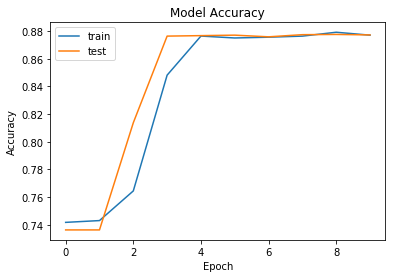

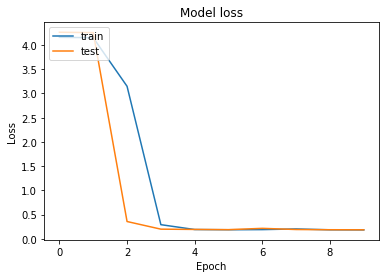

In [44]:
# Plotting the Loss and Classification Accuracy
model.metrics_names
print(history.history.keys())
#  "Accuracy"
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
plt.savefig('classifcn.png')

# "Loss"
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()